In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

In [22]:
# cleaned dataset
df = pd.read_csv("/Users/sa2/Desktop/TKH/Financial-Fraud-Detection/data/processed/cleanedfrauddata.csv")

# Separate features and target
X = df.drop(columns=["isFraud"])
y = df["isFraud"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# train
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# predict
predlog = logreg.predict(X_test)

In [24]:
print(accuracy_score(y_test, predlog))
print(confusion_matrix(y_test, predlog))
print(classification_report(y_test, predlog))

0.9991992292483285
[[1270864      40]
 [    979     641]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.94      0.40      0.56      1620

    accuracy                           1.00   1272524
   macro avg       0.97      0.70      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524



# logistic regression results

accuracy: 99.92%
high accuracy; however, this can be misleading due to class imbalance

confusion matrix:
- 0 false positives (wrongly classified as fraud)
- 979 false negatives (missed fraud cases)

precision, recall, and f1-score:
- precision 94%, very few false fraud alerts
- recall 40%, dosent catch enough real fraud cases
- f1-score 56%, confirms imbalance (high precision but low recall)

model is too cautious, missing fraud

In [27]:
# train
nb = GaussianNB()
nb.fit(X_train, y_train)

#predict
yprednb = nb.predict(X_test)

In [30]:
print(accuracy_score(y_test, yprednb))
print(confusion_matrix(y_test, yprednb))
print(classification_report(y_test, yprednb))

0.8921034102303768
[[1133969  136935]
 [    366    1254]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1270904
           1       0.01      0.77      0.02      1620

    accuracy                           0.89   1272524
   macro avg       0.50      0.83      0.48   1272524
weighted avg       1.00      0.89      0.94   1272524



# naive bayes results

accuracy: 89.21%

confusion matrix:
- 136,935 false positives (wrongly classified as fraud)
- 366 false negatives (missed fraud cases)

precision, recall, and f1-score:
- precision 1%, very low (high false positive rate)
- recall 77%, only 23% of fraud cases are missed
- f1-score 2%, very low, poor balance between precision and recall

misses few fraud cases (high recall) but labels too many non-fraud transactions as fraud (low precision)

In [34]:
# hyperparameter tuning for kNN
paramgrid = {'n_neighbors': [3, 5, 7, 9]} # values to test
gridknn = GridSearchCV(KNeighborsClassifier(), paramgrid, cv=5, scoring='f1') 
gridknn.fit(X_train, y_train) # fits model on training data with cross-validation

print(gridknn.best_params_) # prints best k value

#train with best parameter
knn = KNeighborsClassifier(n_neighbors=gridknn.best_params_['n_neighbors'])
knn.fit(X_train, y_train)

#predict
ypredknn = knn.predict(X_test)

{'n_neighbors': 3}


In [35]:
print(accuracy_score(y_test, ypredknn))
print(confusion_matrix(y_test, ypredknn))
print(classification_report(y_test, ypredknn))

0.9993658272849864
[[1270859      45]
 [    762     858]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.95      0.53      0.68      1620

    accuracy                           1.00   1272524
   macro avg       0.97      0.76      0.84   1272524
weighted avg       1.00      1.00      1.00   1272524



# k-nearest neighbors results

accuracy: 99.94%
few mistakes, but accuracy alone isn't enough to assess fraud detection performance (goes for all models)

confusion matrix:
- 45 false positives (wrongly classified as fraud)
- 762 false negatives (missed fraud cases)

precision, recall, and f1-score:
- precision 95%,  very few false alarms
- recall 53%, nearly half of fraud cases are missed
- f1-score 68%, high precision low recall

kNN (like logistic regression) is too cautious, missing fraud

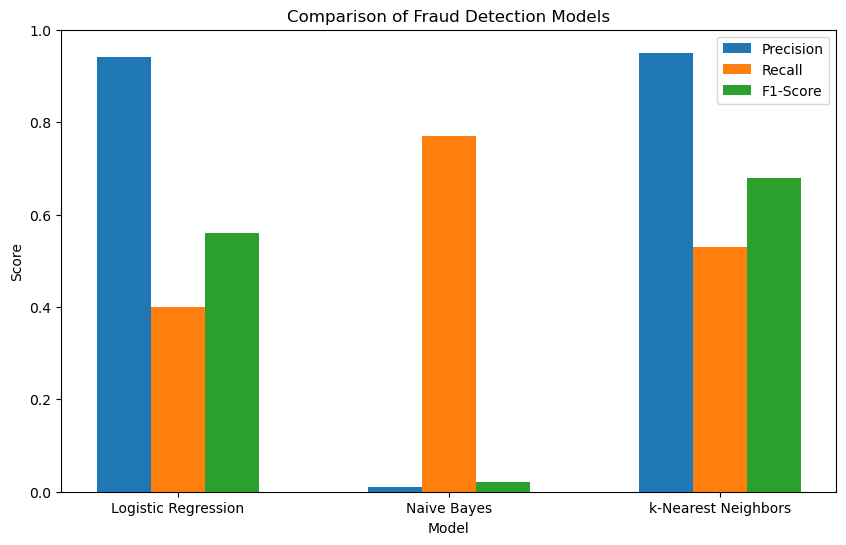

In [10]:
# models and scores
models = ["Logistic Regression", "Naive Bayes", "k-Nearest Neighbors"]
precision = [0.94, 0.01, 0.95]
recall = [0.40, 0.77, 0.53]
f1_score = [0.56, 0.02, 0.68]

# Set bar width and positions
x = np.arange(len(models))  # the label locations
width = 0.2  

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.set_title("Comparison of Fraud Detection Models")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)
ax.legend()

plt.show()


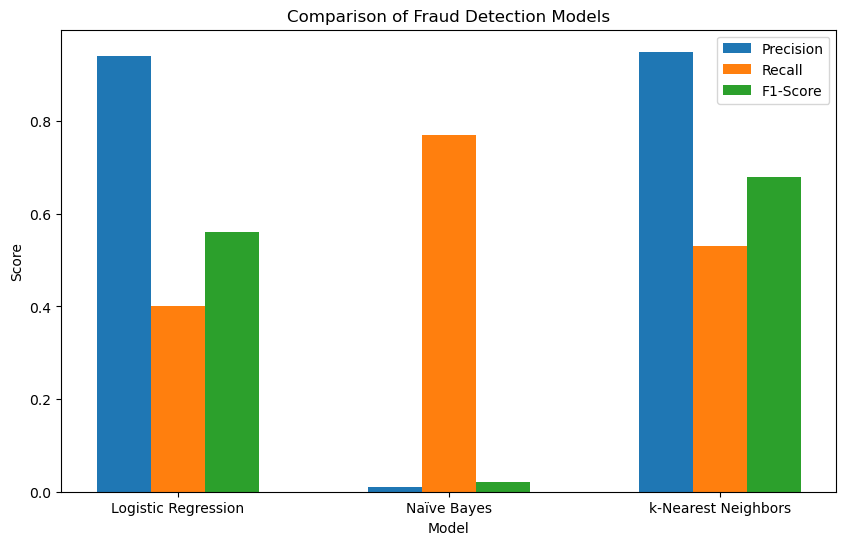

In [21]:
# models and scores
models = ["Logistic Regression", "Naïve Bayes", "k-Nearest Neighbors"]
precision = [0.94, 0.01, 0.95]
recall = [0.40, 0.77, 0.53]
f1_score = [0.56, 0.02, 0.68]

# numpy array for positioning
x = np.arange(len(models))
width = 0.2

# grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.set_title("Comparison of Fraud Detection Models")
ax.legend()

plt.show()



- kNN has the highest accuracy and precision, but recall is weak; highest F1-score, making it the best balanced model 
- logistic regression has lower recall but similar precision
- naive bayes struggles with precision but catches most fraud cases (high recall)